In [72]:
from nltk.probability import FreqDist
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guillaumequispe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
import json

with open('../../data/CLEVR_v1.0/temp/50000_20000_samples/train_questions.json') as json_file:
    data = json.load(json_file)

In [51]:
df=pd.read_json(json.dumps(data["questions"] ))

In [52]:
df.head()

,answer,image_filename,image_index,program,question,question_family_index,question_index,split
0,yes,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",Are there more big green things than large pur...,2,0,train
1,2,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",How many other things are there of the same sh...,43,1,train
2,no,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",Is the color of the large sphere the same as t...,10,2,train
3,rubber,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",What material is the big object that is right ...,34,3,train
4,large,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",How big is the brown shiny sphere?,89,4,train


In [53]:
token=word_tokenize(" ".join(df.question))

In [54]:
fdist = FreqDist(token)

In [55]:
fdist

FreqDist({'the': 128384, 'of': 53852, 'is': 53424, '?': 49923, 'that': 29117, 'same': 25132, 'thing': 24304, 'object': 23267, 'as': 22548, 'cylinder': 15972, ...})

In [58]:
fdist1 = fdist.most_common(30)
#fdist1

In [70]:
fdist1_dict={ key:value for key,value in fdist1}

<BarContainer object of 30 artists>

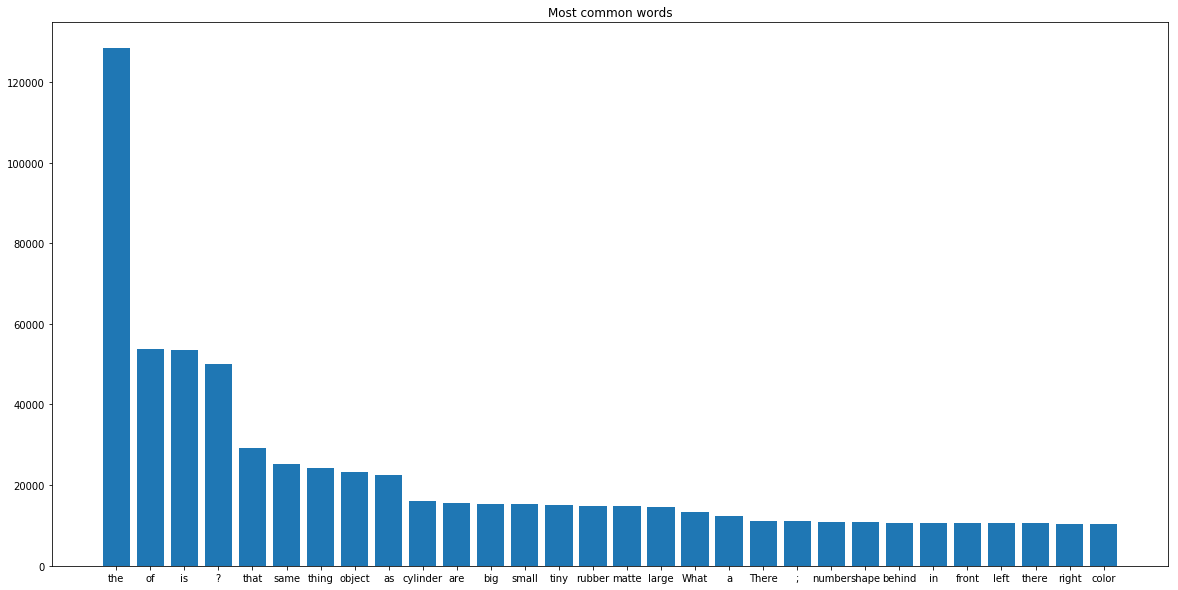

In [92]:
plt.figure(figsize=(20,10))
plt.title("Most common words")
plt.bar(fdist1_dict.keys(), fdist1_dict.values())

In [84]:
len_func=lambda t : len(word_tokenize(t))

In [85]:
len_questions=df.question.apply(len_func)

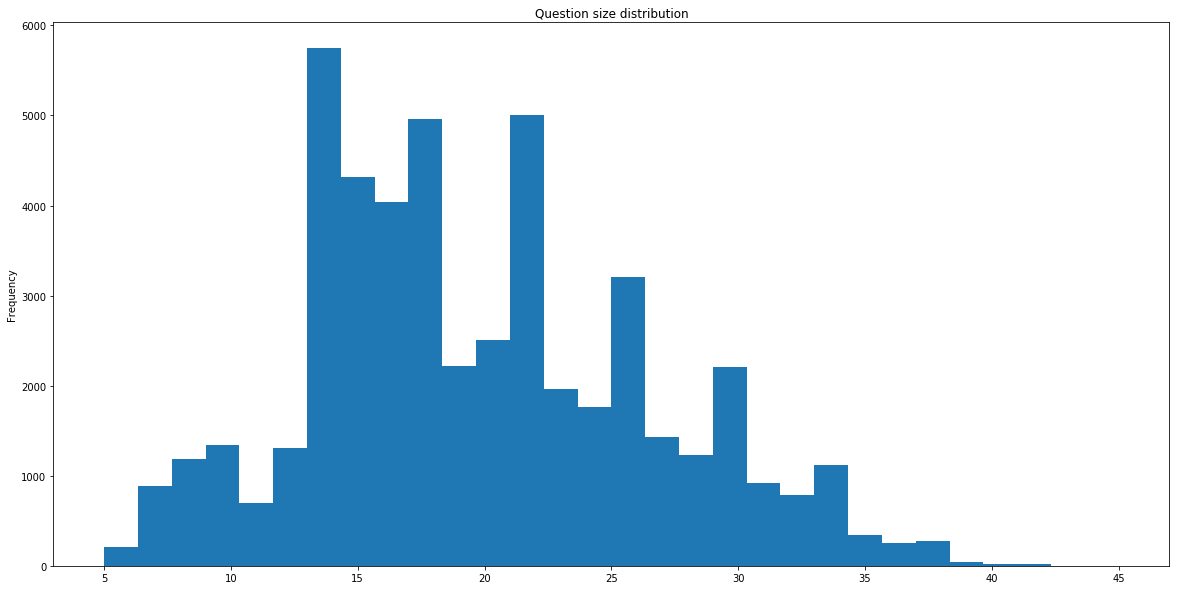

In [93]:
plt.figure(figsize=(20,10))
plt.title("Question size distribution")
len_questions.plot.hist(bins=30 )